In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
os.chdir(r"C:\Users\hanis\OneDrive\Desktop\Kamakshigari Hanish FWI")

df = pd.read_csv("train_data.csv")

df.head()

df

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,27-08-2019 12:00,12.0,7.6,74.4,12.0,0,1015.13,30.0,2.60,0,...,6.9,51.1,10.3,0.9,0.6,0.0,United Kingdom,54.502224,-2.68500,252.0
1,06-06-2018 12:00,11.1,1.7,52.0,22.1,200,1010.80,38.6,1.50,0,...,14.8,104.2,21.9,1.7,2.7,0.2,Canada,55.200000,-119.40000,745.0
2,11-10-2014 12:00,2.9,2.3,95.0,1.9,250,1018.19,27.7,0.00,2,...,3.1,330.1,6.1,0.1,0.0,0.0,Canada,49.820000,-74.98000,381.1
3,11-09-2015 12:00,22.1,11.1,49.8,9.5,267,1015.79,23.9,0.00,4,...,11.4,282.9,20.7,3.8,6.3,0.7,Canada,54.280000,-111.45000,619.0
4,22-06-2016 12:00,17.0,10.0,63.6,35.2,260,1016.70,16.1,0.00,1,...,107.4,482.9,138.1,15.6,47.7,25.4,United States,37.618805,-122.37542,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,02-10-2017 12:00,11.1,-0.8,44.0,19.6,330,1030.60,23.2,0.00,2,...,8.3,205.3,15.1,6.8,8.9,1.3,Canada,47.990000,-66.33417,40.0
1048571,20-09-2014 12:00,9.2,4.1,70.0,9.3,150,1017.10,16.5,0.00,1,...,4.8,190.9,9.1,1.6,0.9,0.0,Canada,47.420000,-68.32000,154.2
1048572,16-09-2019 12:00,16.0,11.0,72.4,11.1,320,1006.10,14.5,0.00,1,...,9.6,250.3,17.4,1.4,1.5,0.1,Canada,53.666668,-113.46667,687.9
1048573,14-07-2018 12:00,26.1,21.7,76.8,14.8,60,1019.10,16.1,9.42,0,...,15.0,86.8,20.9,0.8,0.8,0.0,United States,42.551193,-94.19183,352.4


In [5]:
df.columns


Index(['report_date', 'temperature', 'dew_point_temperature',
       'relative_humidity', 'wind_speed', 'wind_direction',
       'atmospheric_pressure', 'visibility', 'precipitation', 'rain_days',
       'snow_on_ground', 'fine_fuel_moisture_code', 'duff_moisture_code',
       'drought_code', 'build_up_index', 'initial_spread_index',
       'fire_weather_index', 'daily_severity_rating', 'country', 'latitude',
       'longitude', 'elevation'],
      dtype='object')

In [6]:
cols_to_drop = ['Unnamed: 0', 'report_date', 'visibility', 
                'daily_severity_rating', 'country', 
                'latitude', 'longitude', 'elevation']

data = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [7]:
data


,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,precipitation,rain_days,snow_on_ground,fine_fuel_moisture_code,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index
0,12.0,7.6,74.4,12.0,0,1015.13,2.60,0,0.0,64.1,6.9,51.1,10.3,0.9,0.6
1,11.1,1.7,52.0,22.1,200,1010.80,1.50,0,0.0,66.2,14.8,104.2,21.9,1.7,2.7
2,2.9,2.3,95.0,1.9,250,1018.19,0.00,2,0.0,44.3,3.1,330.1,6.1,0.1,0.0
3,22.1,11.1,49.8,9.5,267,1015.79,0.00,4,0.0,85.8,11.4,282.9,20.7,3.8,6.3
4,17.0,10.0,63.6,35.2,260,1016.70,0.00,1,0.0,86.6,107.4,482.9,138.1,15.6,47.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,11.1,-0.8,44.0,19.6,330,1030.60,0.00,2,0.0,86.3,8.3,205.3,15.1,6.8,8.9
1048571,9.2,4.1,70.0,9.3,150,1017.10,0.00,1,0.0,78.7,4.8,190.9,9.1,1.6,0.9
1048572,16.0,11.0,72.4,11.1,320,1006.10,0.00,1,0.0,75.3,9.6,250.3,17.4,1.4,1.5
1048573,26.1,21.7,76.8,14.8,60,1019.10,9.42,0,0.0,59.1,15.0,86.8,20.9,0.8,0.8


In [8]:
data.columns

Index(['temperature', 'dew_point_temperature', 'relative_humidity',
       'wind_speed', 'wind_direction', 'atmospheric_pressure', 'precipitation',
       'rain_days', 'snow_on_ground', 'fine_fuel_moisture_code',
       'duff_moisture_code', 'drought_code', 'build_up_index',
       'initial_spread_index', 'fire_weather_index'],
      dtype='object')

In [9]:
data = data.drop(columns=['precipitation', 'dew_point_temperature', 'snow_on_ground'])


Explained variance ratios: [0.39761294 0.12817121]


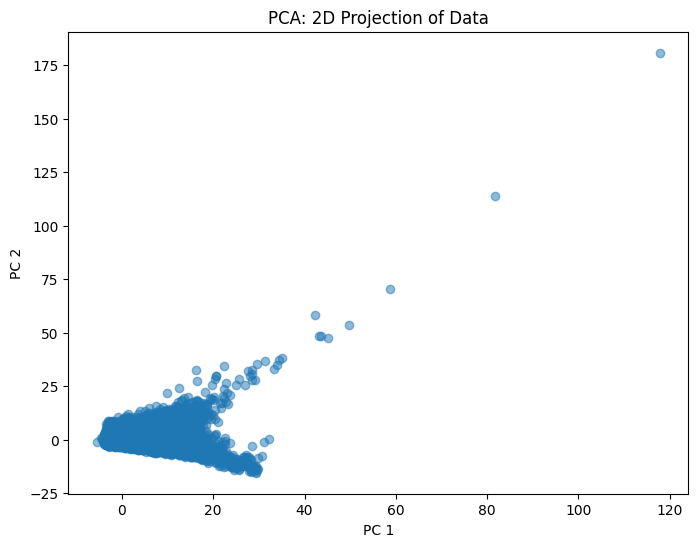

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numeric features and scale
numeric_cols = data.select_dtypes(include='number').columns
X = data[numeric_cols].fillna(data[numeric_cols].median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
print("Explained variance ratios:", pca.explained_variance_ratio_)

# Plot the 2D PCA projection
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA: 2D Projection of Data')
plt.savefig('PCA.png')
plt.show()

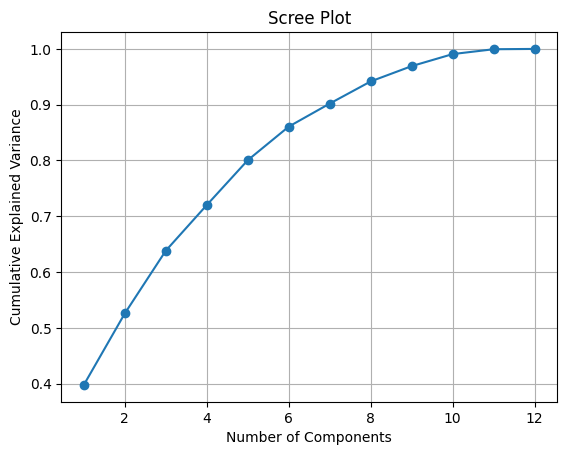

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = data.select_dtypes(include='number').columns
X = data[numeric_cols].fillna(data[numeric_cols].median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA().fit(X_scaled)  
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.savefig('Scree_Plot.png')
plt.show()


PCA Loadings:
                              PC1       PC2       PC3       PC4       PC5  \
temperature              0.246938 -0.029866  0.306471 -0.604940  0.039998   
relative_humidity       -0.324810 -0.025018 -0.435359  0.030283 -0.070502   
wind_speed               0.047581  0.659122 -0.139593  0.251526 -0.139307   
wind_direction           0.021881  0.295541  0.010968  0.113301  0.928390   
atmospheric_pressure    -0.001314 -0.341581  0.405744  0.683779  0.011166   
rain_days                0.260416 -0.108574 -0.068207  0.261808 -0.079477   
fine_fuel_moisture_code  0.312684 -0.019221  0.456254 -0.021010  0.040378   
duff_moisture_code       0.381764 -0.199246 -0.315907  0.015701  0.071861   
drought_code             0.328012 -0.195174 -0.334101  0.058018  0.095860   
build_up_index           0.397594 -0.201642 -0.315737  0.010830  0.077691   
initial_spread_index     0.292253  0.423622  0.090422  0.120370 -0.259698   
fire_weather_index       0.410317  0.223502 -0.014024  0.04765

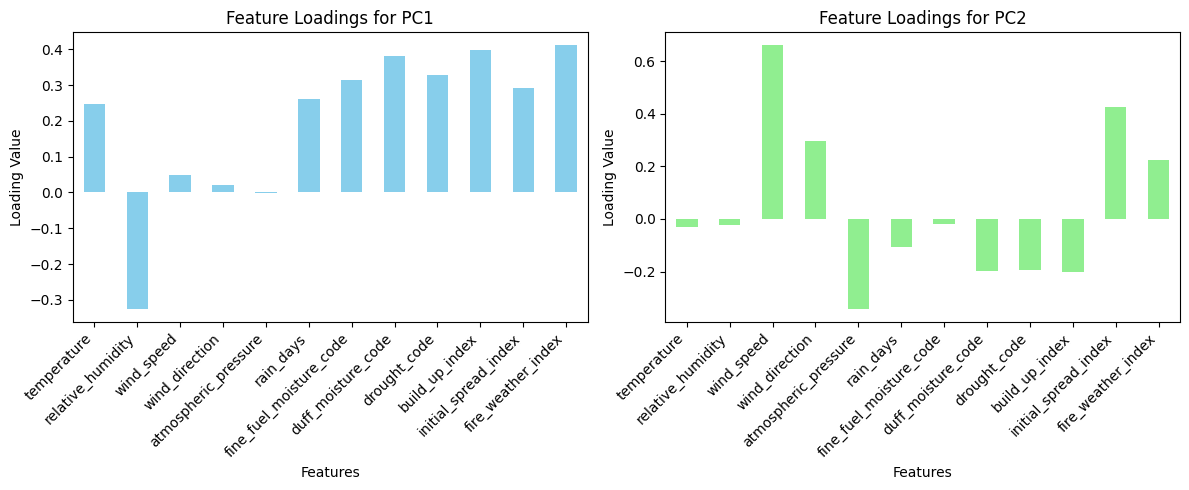

In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Select numeric features (adjust as needed)
numeric_cols = data.select_dtypes(include='number').columns
X = data[numeric_cols].fillna(data[numeric_cols].median())

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA (let's keep all components)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 4: Create DataFrame of PCA loadings
feature_names = numeric_cols
loadings = pca.components_
loading_df = pd.DataFrame(loadings.T, index=feature_names, 
                          columns=[f'PC{i+1}' for i in range(loadings.shape[0])])

# Display the loadings DataFrame
print("PCA Loadings:")
print(loading_df)

# Step 5: Find top 5 contributors (highest absolute loadings) for PC1 and PC2
top_pc1 = loading_df['PC1'].abs().sort_values(ascending=False).head(5)
top_pc2 = loading_df['PC2'].abs().sort_values(ascending=False).head(5)

print("\nTop 5 contributors to PC1:")
print(top_pc1)

print("\nTop 5 contributors to PC2:")
print(top_pc2)

# Step 6 (Optional): Bar plots of loadings for PC1 and PC2
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
loading_df['PC1'].plot(kind='bar', color='skyblue')
plt.title('Feature Loadings for PC1')
plt.ylabel('Loading Value')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
loading_df['PC2'].plot(kind='bar', color='lightgreen')
plt.title('Feature Loadings for PC2')
plt.ylabel('Loading Value')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('feature_loading.png')
plt.show()


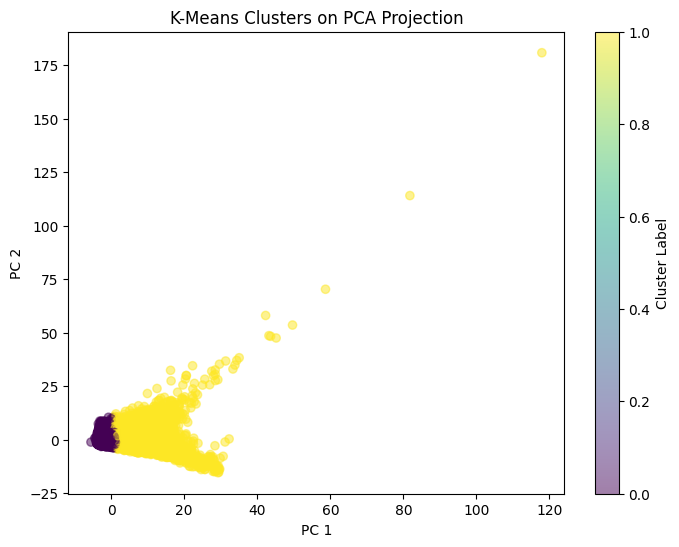

In [13]:
from sklearn.cluster import KMeans


numeric_cols = data.select_dtypes(include='number').columns
X = data[numeric_cols].fillna(data[numeric_cols].median())

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('K-Means Clusters on PCA Projection')
plt.colorbar(label='Cluster Label')
plt.savefig('cluster_loading.png')
plt.show()


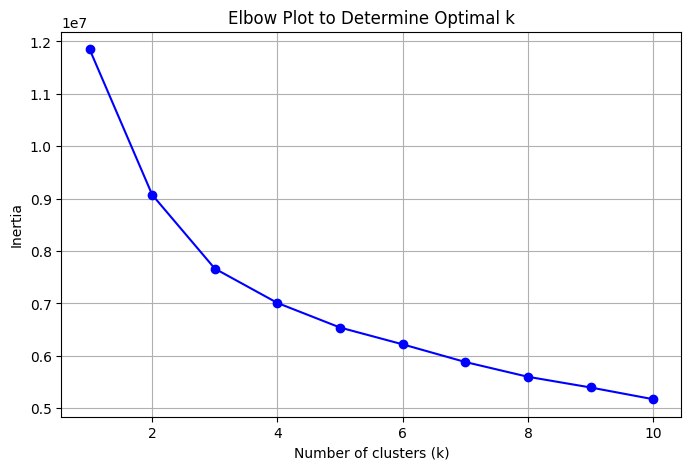

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use your PCA-transformed data (e.g., first several PCs)
X_input = X_pca[:, :8]  # adjust number of PCs as needed

k_values = range(1, 11)  # Try from 1 to 10 clusters
inertia_vals = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_input)
    inertia_vals.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia_vals, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot to Determine Optimal k')
plt.grid(True)
plt.savefig('Elbow_Plot_to_Determine_Optimal_k.png')
plt.show()


In [15]:
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster_label'] = kmeans.fit_predict(X_input)

print(data.groupby('cluster_label').mean())        # Mean of all variables by cluster
print(data.groupby('cluster_label')['fire_weather_index'].describe())  # FWI stats by cluster


               temperature  relative_humidity  wind_speed  wind_direction  \
cluster_label                                                               
0                15.257384          63.710291   14.486556      193.633352   
1                22.408537          36.231973   17.291550      200.482541   

               atmospheric_pressure  rain_days  fine_fuel_moisture_code  \
cluster_label                                                             
0                       1014.741377   1.499940                69.357082   
1                       1013.779897   6.525874                90.573885   

               duff_moisture_code  drought_code  build_up_index  \
cluster_label                                                     
0                       14.950549    184.017273       22.654148   
1                       79.799669    503.588135      108.444847   

               initial_spread_index  fire_weather_index  
cluster_label                                            
0    

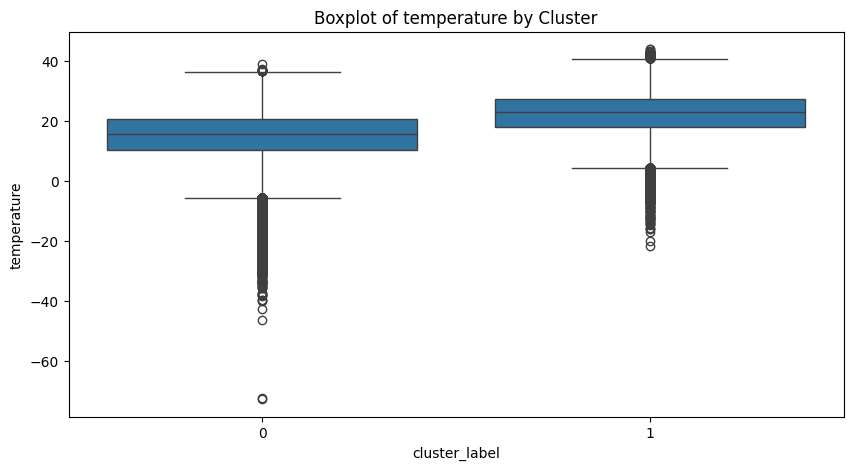

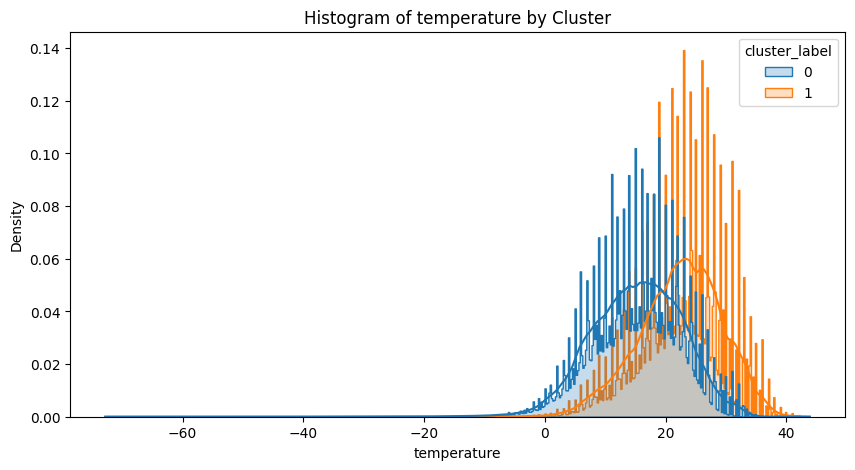

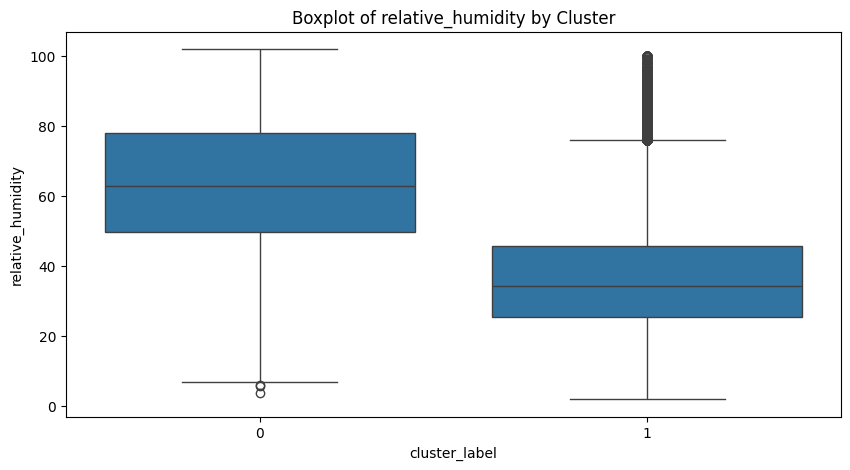

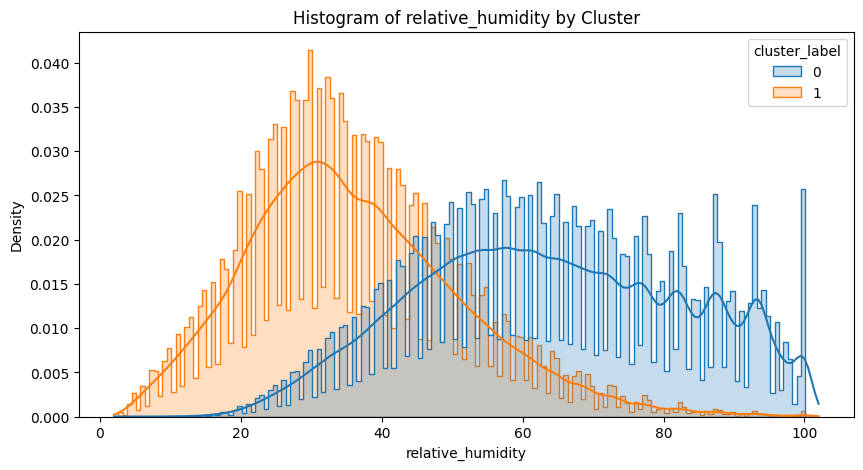

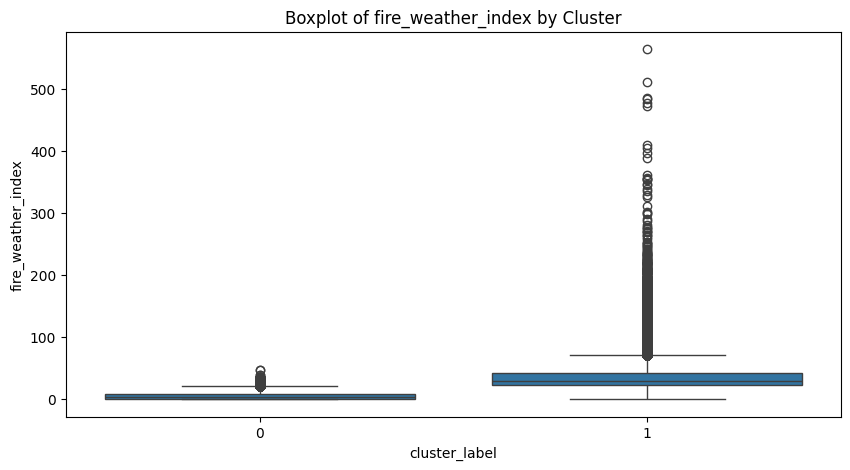

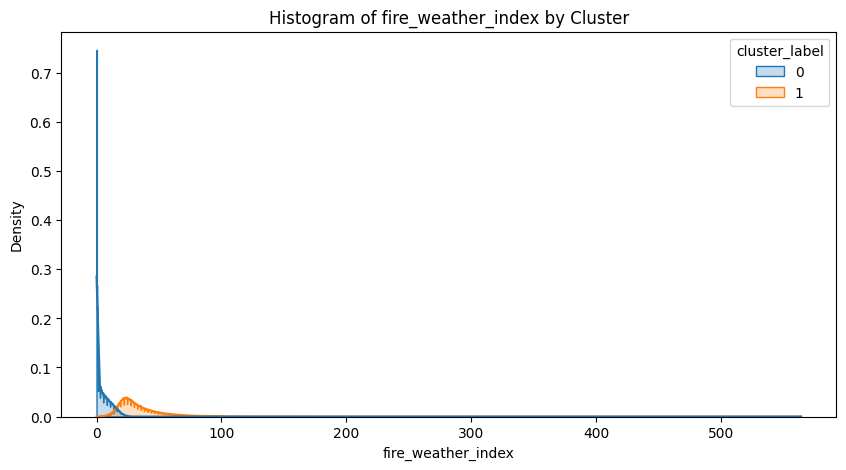

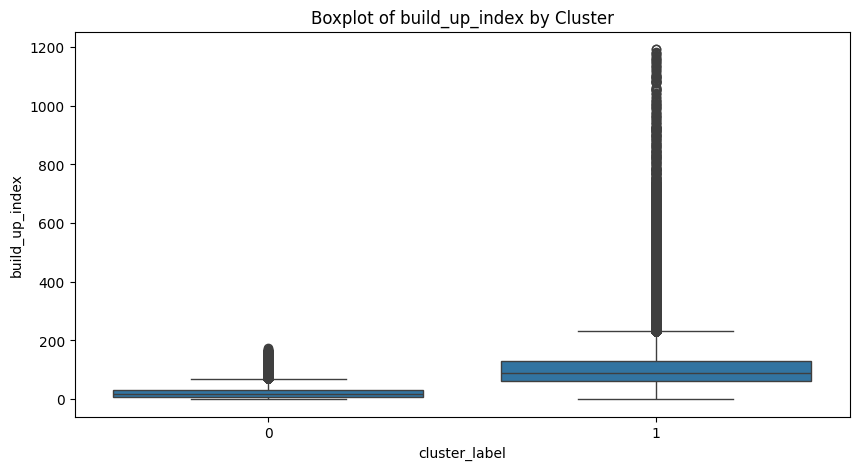

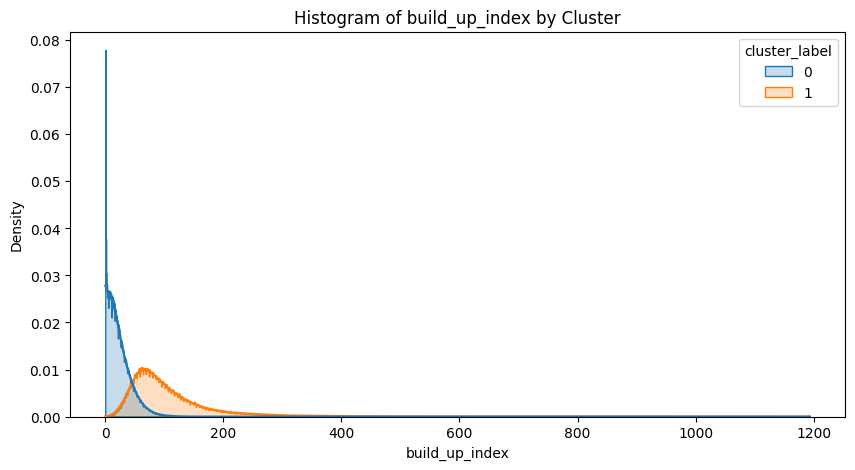

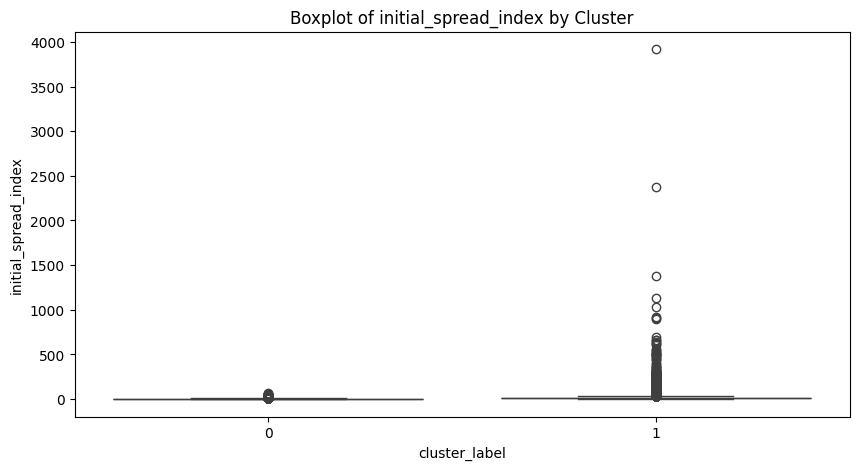

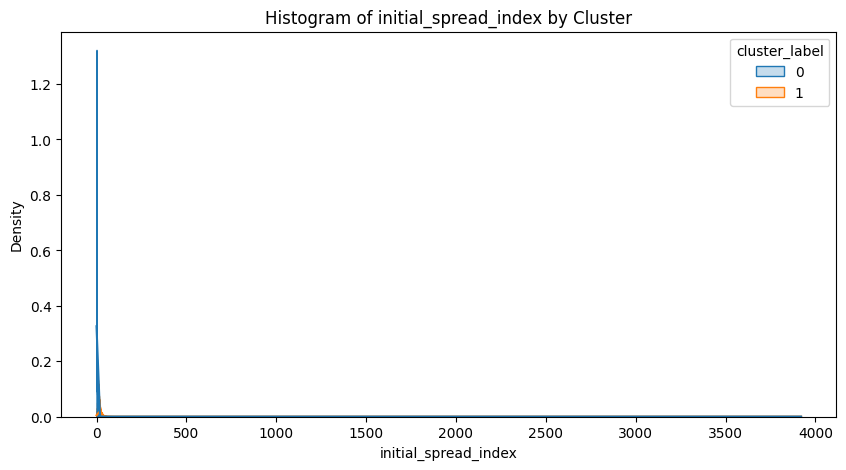

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to visualize (adjust as needed)
features = ['temperature', 'relative_humidity', 'fire_weather_index', 'build_up_index','initial_spread_index']

for feature in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='cluster_label', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Cluster')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.histplot(data, x=feature, hue='cluster_label', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Histogram of {feature} by Cluster')

    
    plt.show()
